<a href="https://colab.research.google.com/github/DattaIn/idatta.github.io/blob/master/Image_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [ ]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

replace FullIJCNN2013/00000.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

#### Initial test of data

In [ ]:
gt = pd.read_csv('/content/FullIJCNN2013/gt.txt', delimiter=';', header=None)
gt.columns = ['ImgNo', 'leftCol', 'topRow', 'rightCol', 'bottomRow', 'ClassID']
gt.head(10)

,ImgNo,leftCol,topRow,rightCol,bottomRow,ClassID
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39
5,00003.ppm,742,443,765,466,4
6,00003.ppm,742,466,764,489,9
7,00003.ppm,737,412,769,443,21
8,00004.ppm,898,342,967,409,21
9,00004.ppm,906,407,955,459,2


In [ ]:
Image.open('/content/FullIJCNN2013/00004.ppm')

PPM
RGB
(57, 59)


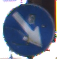

In [ ]:
# YOUR CODE HERE
path = '/content/FullIJCNN2013/38/00000.ppm'
image = Image.open(path)
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image

In [ ]:
image_resized = image.resize((30,30))
image_resized

In [ ]:
img = imread(path, as_gray=False)
img1 = img.copy()
img1.resize((30,30))
print(img1.shape)
print(img.shape, type(img))

(30, 30)
(59, 57, 3) <class 'numpy.ndarray'>


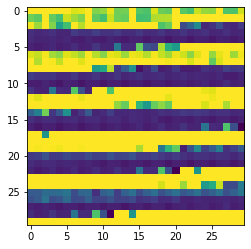

In [ ]:
plt.imshow(img1)#, cmap='gray')
plt.show()

In [ ]:
a = img.ravel()
a.shape

(10089,)

In [ ]:
tf_img = tf.image.per_image_standardization(img)
tf_img.shape

TensorShape([59, 57, 3])

In [ ]:
tf_img1 = tf.image.resize(tf_img, (30,30))

In [ ]:
img_np = tf_img1.numpy()

In [ ]:
b = img_np.ravel()
b.shape

(2700,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


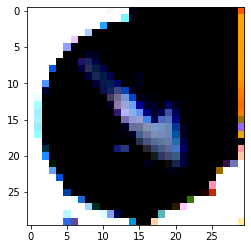

In [ ]:
plt.imshow(img_np)
plt.show()

#### Create dictionary

In [ ]:
ID = [x for x in range(43)]
Label = ['speed limit 20 (prohibitory)',
'speed limit 30 (prohibitory)',
'speed limit 50 (prohibitory)',
'speed limit 60 (prohibitory)',
'speed limit 70 (prohibitory)',
'speed limit 80 (prohibitory)',
'restriction ends 80 (other)',
'speed limit 100 (prohibitory)',
'speed limit 120 (prohibitory)',
'no overtaking (prohibitory)',
'no overtaking (trucks) (prohibitory)',
'priority at next intersection (danger)',
'priority road (other)',
'give way (other)',
'stop (other)',
'no traffic both ways (prohibitory)',
'no trucks (prohibitory)',
'no entry (other)',
'danger (danger)',
'bend left (danger)',
'bend right (danger)',
'bend (danger)',
'uneven road (danger)',
'slippery road (danger)',
'road narrows (danger)',
'construction (danger)',
'traffic signal (danger)',
'pedestrian crossing (danger)',
'school crossing (danger)',
'cycles crossing (danger)',
'snow (danger)',
'animals (danger)',
'restriction ends (other)',
'go right (mandatory)',
'go left (mandatory)',
'go straight (mandatory)',
'go right or straight (mandatory)',
'go left or straight (mandatory)',
'keep right (mandatory)',
'keep left (mandatory)',
'roundabout (mandatory)',
'restriction ends (overtaking) (other)',
'restriction ends (overtaking (trucks)) (other)']

In [ ]:
sign_labels = pd.DataFrame(ID, columns=['ClassID'])
sign_labels['Label'] = Label
sign_labels.head()

,ClassID,Label
0,0,speed limit 20 (prohibitory)
1,1,speed limit 30 (prohibitory)
2,2,speed limit 50 (prohibitory)
3,3,speed limit 60 (prohibitory)
4,4,speed limit 70 (prohibitory)


#### Start feature extraction

In [ ]:
sign_files = glob.glob('/content/FullIJCNN2013/*/*.ppm')
len(sign_files)

1213

In [ ]:
def extract_features(file_name):
    df=np.array([])
    flat_arr=np.array([])

    img = imread(file_name, as_gray=False)
    tf_img = tf.image.per_image_standardization(img)
    tf_img1 = tf.image.resize(tf_img, (30,30))
    img_np = tf_img1.numpy()
    # c = img.copy()
    # c.resize((30,30))
    # possible variations - grayscale, brightening and sharpening
    flat_arr = img_np.ravel()
    df = np.hstack((df, flat_arr))

    fn = int(file_name.split("/")[3])
    df = np.hstack((df, fn))

    return df

In [ ]:
img_features = []
for file_name in sign_files:
    img_features.append(extract_features(file_name))

df = pd.DataFrame(img_features)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,0.793729,0.816926,0.590995,0.817194,0.830666,0.768570,0.976449,0.856301,0.850354,0.809164,0.693626,0.700198,0.696302,0.647678,0.662578,0.712629,0.655083,0.677894,0.675782,0.641433,0.619604,0.574965,0.615113,0.564705,0.548526,0.485716,0.505791,0.462490,0.394178,0.386594,0.391888,0.235666,0.225763,0.244915,0.136306,0.118998,0.324706,0.129912,-0.081090,0.402862,...,-0.173876,-0.313800,-0.572833,-0.584014,-0.699998,-0.749991,-0.742172,-0.878676,-0.918289,-0.761652,-0.992282,-1.080431,-0.795080,-0.974379,-1.098036,-0.855213,-1.015360,-1.085843,-1.072489,-1.182199,-1.295477,-1.314302,-1.367833,-1.497141,-1.362688,-1.430495,-1.487149,-1.249143,-1.341484,-1.417766,-1.152162,-1.263389,-1.379819,-1.185857,-1.284622,-1.371789,-1.100772,-1.243314,-1.302436,1.0
1,1.848583,1.272805,-0.517033,1.928037,1.376095,-0.407387,1.964056,1.450253,-0.326873,1.848053,1.335309,-0.439168,1.876657,1.333720,-0.407387,1.938101,1.427476,-0.275493,1.887251,1.405228,-0.273904,1.881954,1.386689,-0.284497,1.880365,1.412644,-0.220934,2.031327,1.604923,0.012661,1.906849,1.549835,0.003656,1.994249,1.613398,0.192757,2.056753,1.466143,0.160446,2.093302,...,-0.644692,-0.496378,-0.824788,-0.779764,-0.664820,-0.729972,-0.617676,-0.594899,-0.642572,-0.677001,-0.666937,-0.771818,-0.715139,-0.709843,-0.744802,-0.785059,-0.763871,-0.785059,-0.806777,-0.821608,-0.880934,-0.724144,-0.827964,-0.920661,-0.568944,-0.776054,-0.915364,-0.295621,-0.558349,-0.526038,-0.464594,-0.565236,-0.475187,-0.674353,-0.705605,-0.720966,-0.718847,-0.735797,-0.773406,1.0
2,-0.468577,-0.841033,-1.089337,-0.667220,-0.940355,-1.114168,-0.841033,-0.985877,-1.161760,-0.704466,-0.863794,-1.066576,-0.394086,-0.648597,-0.890694,-0.164404,-0.516169,-0.812064,-0.079567,-0.565829,-0.903109,0.028032,-0.592729,-0.903109,-0.214065,-0.700328,-1.010708,-0.433401,-0.785165,-1.004500,-0.834826,-0.958978,-1.070715,-0.927940,-0.783095,-0.859656,-0.551345,-0.292695,-0.396155,-0.040252,...,0.338412,-0.230619,-0.127159,0.280474,-0.261657,-0.205788,0.313581,-0.251311,-0.369255,0.259782,-0.385809,-0.634113,0.197706,-0.495476,-0.747919,0.090108,-0.468577,-0.747919,-0.017491,-0.441677,-0.721020,-0.216134,-0.574106,-0.853449,-0.394086,-0.716881,-0.977601,-0.497546,-0.807926,-1.041746,-0.540999,-0.851379,-1.058299,-0.555483,-0.865864,-1.052092,-0.530653,-0.841033,-1.027261,1.0
3,0.622263,-0.945655,-1.297637,0.622263,-0.959254,-1.256839,0.526268,-0.973654,-1.213641,0.348677,-1.050450,-1.326435,0.129489,-0.913657,-1.252839,0.950245,0.425473,0.215884,2.094186,1.958993,1.948593,2.094186,2.094186,2.094186,2.094186,2.094186,2.094186,2.094186,2.094186,2.090186,2.094186,2.094186,2.018190,2.094186,2.094186,1.946193,1.614211,0.846251,0.590264,1.163035,...,-0.097699,-1.345634,-1.257639,-0.100099,-1.350434,-1.255239,-0.118498,-1.379232,-1.384832,-0.204894,-1.408031,-1.514425,-0.155296,-1.314436,-1.358433,-0.217693,-1.213641,-1.185642,0.195085,-0.624072,-0.607273,0.694259,0.153487,0.118289,0.939046,0.743856,0.816652,1.047040,1.147035,1.504615,1.114237,1.434220,1.962193,0.915047,1.422221,1.779802,0.942246,1.422221,1.630210,1.0
4,-0.695160,-0.806511,-0.989282,-0.678146,-0.767468,-0.845363,-0.495121,-0.605583,-0.500834,-0.314572,-0.269308,-0.000579,-0.018228,0.118136,-0.019942,0.436827,0.551289,0.397467,0.871567,0.763136,0.787387,1.276469,0.972125,0.997265,1.586145,1.160166,1.075732,1.806054,1.305227,1.047545,1.805165,1.345984,0.998408,1.519867,1.267073,0.818811,0.963237,0.661497,0.157877,0.419813,...,-0.136689,-0.542797,-0.691668,-0.050097,-0.388658,-0.578349,-0.239724,-0.486931,-0.627105,-0.460459,-0.657894,-0.755533,-0.557907,-0.691604,-0.740805,-0.531497,-0.668623,-0.710142,-0.423828,-0.671670,-0.708999,-0.466426,-0.576825,-

In [ ]:
df.shape

(1213, 2701)

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

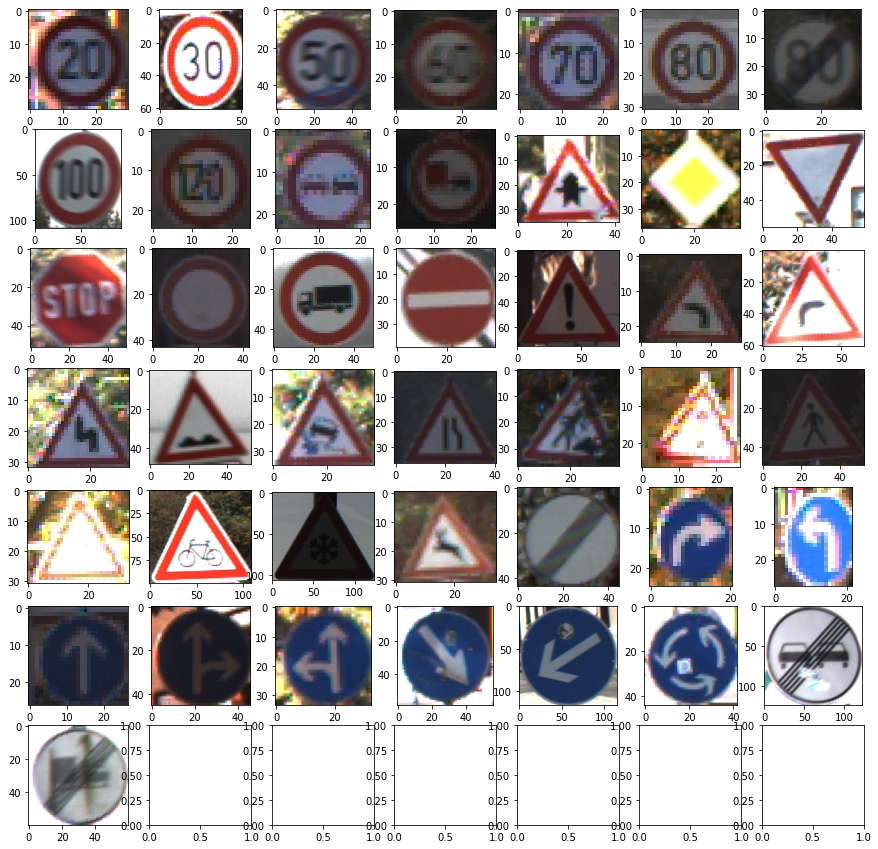

In [ ]:
f, ax = plt.subplots(7,7, figsize=(15,15))
m, n = (0,0)
for i in range(43):
    m = int(i/7)
    n = i - m*7
    if i < 10: j = '0'+ str(i)
    else: j = str(i)
    path = '/content/FullIJCNN2013/'+ j + '/00000.ppm'
    image = imread(path, as_gray=False)
    ax[m, n].imshow(image, cmap='gray')
plt.show()

#### Plot the distribution of Classes

In [ ]:
plt.figure(figsize=(16,5))
df[2701].hist(bins=43, rwidth=0.5)
plt.show()

KeyError: ignored

<Figure size 1152x360 with 0 Axes>

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_normalized = pd.DataFrame(preprocessing.normalize(X, norm='l2'))
X_normalized.shape

(1213, 2700)

In [ ]:
y.describe()

count    1213.000000
mean       14.837593
std        11.851147
min         0.000000
25%         5.000000
50%        12.000000
75%        22.000000
max        42.000000
Name: 2700, dtype: float64

In [ ]:
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699
0,0.015791,0.016252,0.011758,0.016258,0.016526,0.015290,0.019426,0.017036,0.016917,0.016098,0.013799,0.013930,0.013853,0.012885,0.013182,0.014177,0.013033,0.013486,0.013444,0.012761,0.012327,0.011439,0.012237,0.011235,0.010913,0.009663,0.010063,0.009201,0.007842,0.007691,0.007796,0.004688,0.004491,0.004872,0.002712,0.002367,0.006460,0.002585,-0.001613,0.008015,...,-0.009289,-0.003459,-0.006243,-0.011396,-0.011619,-0.013926,-0.014921,-0.014765,-0.017481,-0.018269,-0.015153,-0.019741,-0.021495,-0.015818,-0.019385,-0.021845,-0.017014,-0.020200,-0.021602,-0.021337,-0.023519,-0.025773,-0.026148,-0.027212,-0.029785,-0.027110,-0.028459,-0.029586,-0.024851,-0.026688,-0.028206,-0.022922,-0.025135,-0.027451,-0.023592,-0.025557,-0.027291,-0.021899,-0.024735,-0.025911
1,0.037924,0.026112,-0.010607,0.039554,0.028231,-0.008358,0.040293,0.029752,-0.006706,0.037913,0.027394,-0.009010,0.038500,0.027362,-0.008358,0.039761,0.029285,-0.005652,0.038718,0.028829,-0.005619,0.038609,0.028448,-0.005837,0.038576,0.028981,-0.004533,0.041673,0.032926,0.000260,0.039120,0.031795,0.000075,0.040913,0.033099,0.003954,0.042195,0.030078,0.003292,0.042945,...,-0.015899,-0.013226,-0.010183,-0.016921,-0.015997,-0.013639,-0.014976,-0.012672,-0.012205,-0.013183,-0.013889,-0.013682,-0.015834,-0.014671,-0.014563,-0.015280,-0.016106,-0.015671,-0.016106,-0.016551,-0.016856,-0.018073,-0.014856,-0.016986,-0.018888,-0.011672,-0.015921,-0.018779,-0.006065,-0.011455,-0.010792,-0.009531,-0.011596,-0.009749,-0.013835,-0.014476,-0.014791,-0.014747,-0.015095,-0.015867
2,-0.009459,-0.016977,-0.021990,-0.013469,-0.018982,-0.022491,-0.016977,-0.019901,-0.023452,-0.014221,-0.017437,-0.021530,-0.007955,-0.013093,-0.017980,-0.003319,-0.010420,-0.016393,-0.001606,-0.011422,-0.018230,0.000566,-0.011965,-0.018230,-0.004321,-0.014137,-0.020402,-0.008749,-0.015850,-0.020277,-0.016852,-0.019358,-0.021614,-0.018732,-0.015808,-0.017353,-0.011130,-0.005908,-0.007997,-0.000813,...,-0.001063,0.006831,-0.004655,-0.002567,0.005662,-0.005282,-0.004154,0.006330,-0.005073,-0.007454,0.005244,-0.007788,-0.012800,0.003991,-0.010002,-0.015098,0.001819,-0.009459,-0.015098,-0.000353,-0.008916,-0.014555,-0.004363,-0.011589,-0.017228,-0.007955,-0.014471,-0.019734,-0.010044,-0.016309,-0.021029,-0.010921,-0.017186,-0.021363,-0.011213,-0.017479,-0.021238,-0.010712,-0.016977,-0.020737
3,0.012876,-0.019567,-0.026850,0.012876,-0.019849,-0.026006,0.010889,-0.020147,-0.025112,0.007215,-0.021736,-0.027446,0.002679,-0.018905,-0.025923,0.019662,0.008804,0.004467,0.043332,0.040535,0.040320,0.043332,0.043332,0.043332,0.043332,0.043332,0.043332,0.043332,0.043332,0.043250,0.043332,0.043332,0.041760,0.043332,0.043332,0.040270,0.033401,0.017510,0.012214,0.024065,...,-0.026619,-0.002022,-0.027844,-0.026023,-0.002071,-0.027943,-0.025973,-0.002452,-0.028539,-0.028655,-0.004240,-0.029135,-0.031336,-0.003213,-0.027198,-0.028108,-0.004504,-0.025112,-0.024533,0.004037,-0.012913,-0.012566,0.014365,0.003176,0.002448,0.019431,0.015392,0.016898,0.021665,0.023734,0.031133,0.023056,0.029677,0.040601,0.018934,0.029428,0.036827,0.019497,0.029428,0.033732
4,-0.013756,-0.015959,-0.019576,-0.013419,-0.015187,-0.016728,-0.009798,-0.011983,-0.009911,-0.006225,-0.005329,-0.000011,-0.000361,0.002338,-0.000395,0.008644,0.010909,0.007865,0.017247,0.015101,0.015581,0.025259,0.019237,0.019734,0.031387,0.022958,0.021287,0.035739,0.025828,0.020729,0.035721,0.026635,0.019757,0.030075,0.025073,0.016203,0.019061,0.013090,0.003124,0.008307,...,-0.015240,-0.002705,-0.010741,-0.013687,-0.000991,-0.007691,-0.011444,-0.004744,-0.009635,-0.012409,-0.009112,-0.013019,-0.014951,-0.011040,-0.013686,-0.014659,-0.010517,-0.013231,-0.014052,-0.008387,-0.0132

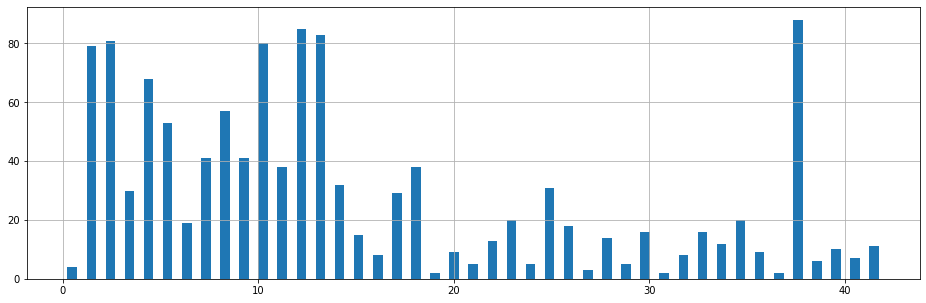

In [ ]:
plt.figure(figsize=(16,5))
y.hist(bins=43, rwidth=0.5)
plt.show()

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state = 42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42, stratify=y_train)

In [ ]:
# # Using stratified shuffle split
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
# sss.get_n_splits(X, y)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 43), activation="relu", solver='adam', alpha=0.001, max_iter=500).fit(X_train, y_train)

In [ ]:
y_pred = np.round(clf.predict(X_test), 0)
y_pred

array([10., 22.,  3.,  4., 38., 13., 17., 38.,  6., 10., 12., 25., 22.,
        5., 13., 38., 38., 34.,  1.,  2., 30.,  2.,  8., 10., 11., 18.,
        8., 11.,  0., 10.,  8.,  1., 15., 15., 12.,  4.,  5.,  8.,  3.,
        2., 30., 15., 21.,  2.,  5.,  8., 17.,  1., 38.,  4.,  6., 10.,
        3., 11.,  2.,  2., 38.,  8., 13.,  7.,  9.,  2., 12., 36.,  2.,
       18., 38., 12., 17., 10.,  9.,  5.,  8.,  9., 13., 33., 25., 13.,
       10., 25., 38.,  2., 11., 11.,  8., 12.,  4., 30., 35., 38.,  5.,
       13.,  1., 18., 17., 12., 33., 10., 20., 13., 35., 38., 12.,  5.,
       10.,  7.,  4., 18., 17.,  6.,  2., 42., 26., 12.,  5., 29.,  6.,
        5., 12., 37.,  7., 13.,  1.,  2., 17.,  9., 25., 13., 13., 14.,
       26., 13.,  5., 18.,  8., 10., 26.,  5., 18., 36.,  9.,  4.,  8.,
       18., 12., 12.,  4., 18.,  1.,  8., 13., 27., 20., 13., 11., 35.,
       38., 34., 23., 12., 29.,  5., 38., 11.,  8., 38.,  4.,  8.,  7.,
       14., 18.,  3.,  8., 41., 16.,  1.,  9., 10., 10., 12., 16

In [ ]:
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(y_test, y_pred))
clf.score(X_test, y_test)

0.7366255144032922

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100), (100,), (100, 100, 100, 43)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
clf = MLPClassifier(max_iter=500)
rand_clf = RandomizedSearchCV(clf, param_distributions=parameter_space)
search = rand_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-

In [ ]:
search.best_score_

0.8528389230042513

In [ ]:
search.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

#### Ignore keras gridsearch

In [ ]:
from keras.optimizers import SGD
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[900]):
    model = Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(Dense(43, **options))
    optimizer = SGD(learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
from scipy.stats import reciprocal
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [ ]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer:

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the laye

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the laye

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_6 is incompatible with the laye

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_8 is incompatible with the laye

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_10 is incompatible with the lay

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_12 is incompatible with the lay

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_14 is incompatible with the lay

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_16 is incompatible with the lay

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_17 is incompatible with the lay

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_19 is incompatible with the lay

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_21 is incompatible with the lay

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_23 is incompatible with the lay

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_25 is incompatible with the lay

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_27 is incompatible with the lay

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_29 is incompatible with the lay

ValueError: ignored

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model

In [ ]:
model.evaluate(X_test, y_test)

#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(criterion='gini', max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(X_test, y_test)

0.43209876543209874

#### Ignore

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_val, y_val))

NameError: ignored

In [ ]:
vis = pd.DataFrame(history.history)
vis.plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
# Step 1 - Build the architecture
# YOUR CODE HERE
# Create model with 2 hidden layers and one output layer
model = Sequential([
                    Dense(600, activation="relu"),
                    Dense(300, activation="relu"),
                    Dense(100, activation="relu"),
                    Dense(43, activation="softmax")
                    ])

In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

In [ ]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

Epoch 1/30
23/23 [==============================] - 18s 35ms/step - loss: 3.7603 - accuracy: 0.0219 - val_loss: 3.7512 - val_accuracy: 0.0741
Epoch 2/30
23/23 [==============================] - 0s 11ms/step - loss: 3.7495 - accuracy: 0.1008 - val_loss: 3.7422 - val_accuracy: 0.0823
Epoch 3/30
23/23 [==============================] - 0s 10ms/step - loss: 3.7397 - accuracy: 0.0858 - val_loss: 3.7334 - val_accuracy: 0.0782
Epoch 4/30
23/23 [==============================] - 0s 10ms/step - loss: 3.7334 - accuracy: 0.0824 - val_loss: 3.7245 - val_accuracy: 0.0782
Epoch 5/30
23/23 [==============================] - 0s 10ms/step - loss: 3.7238 - accuracy: 0.0741 - val_loss: 3.7156 - val_accuracy: 0.0700
Epoch 6/30
23/23 [==============================] - 0s 10ms/step - loss: 3.7129 - accuracy: 0.0730 - val_loss: 3.7067 - val_accuracy: 0.0700
Epoch 7/30
23/23 [==============================] - 0s 10ms/step - loss: 3.7014 - accuracy: 0.0907 - val_loss: 3.6977 - val_accuracy: 0.0700
Epoch 8/30
2

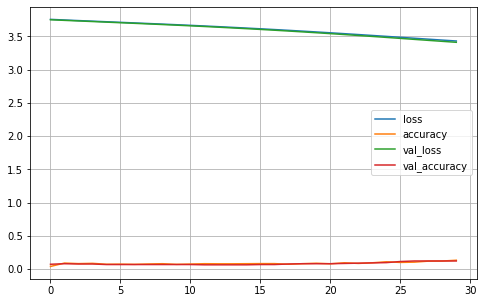

In [ ]:
vis = pd.DataFrame(history.history)
vis.plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 5ms/step - loss: 3.4216 - accuracy: 0.1235


[3.4215753078460693, 0.12345679104328156]

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 600)               1620600   
_________________________________________________________________
dense_86 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_87 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_88 (Dense)             (None, 43)                4343      
Total params: 1,835,343
Trainable params: 1,835,343
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([10, 10, 10, 10, 38, 10, 10, 38, 10, 10, 10, 10, 10, 10, 10, 38, 38,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 38, 10, 10,
       10, 10,  1, 10, 10, 38, 10, 10, 10, 10, 10, 10, 10, 10, 10, 38, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 38, 10, 10, 10,  1,
       10, 10, 10, 10, 38, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 38, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  1, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  1, 10, 10, 10,
       10, 10, 10, 38, 10, 10, 10,  1, 10, 38, 10, 10, 38, 10, 10, 10, 10,
        1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 38, 10, 10, 10, 38, 10, 10, 10, 10, 10, 10, 38, 10, 38,
       10, 10, 10, 10, 10, 10, 38, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
from tensorflow.keras.layers import Flatten
from keras.regularizers import l2

In [ ]:
# YOUR CODE HERE
model = Sequential([
                    Flatten(input_shape=[30, 30]),
                    Dense(100, activation="relu", kernel_initializer="he_normal"),
                    Dense(100, activation="relu"),
                    Dense(100, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
                    Dense(43, activation="softmax")
                    ])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'], )

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

Epoch 1/30
23/23 [==============================] - 3s 22ms/step - loss: 4.6416 - accuracy: 0.1414 - val_loss: 4.0534 - val_accuracy: 0.2058
Epoch 2/30
23/23 [==============================] - 0s 4ms/step - loss: 3.8224 - accuracy: 0.2618 - val_loss: 3.0724 - val_accuracy: 0.3663
Epoch 3/30
23/23 [==============================] - 0s 5ms/step - loss: 2.9660 - accuracy: 0.3873 - val_loss: 2.5379 - val_accuracy: 0.4403
Epoch 4/30
23/23 [==============================] - 0s 5ms/step - loss: 2.4387 - accuracy: 0.4354 - val_loss: 2.1507 - val_accuracy: 0.4568
Epoch 5/30
23/23 [==============================] - 0s 5ms/step - loss: 1.9347 - accuracy: 0.5918 - val_loss: 1.8711 - val_accuracy: 0.6173
Epoch 6/30
23/23 [==============================] - 0s 5ms/step - loss: 1.7206 - accuracy: 0.6356 - val_loss: 1.6965 - val_accuracy: 0.5844
Epoch 7/30
23/23 [==============================] - 0s 5ms/step - loss: 1.5745 - accuracy: 0.6597 - val_loss: 1.5578 - val_accuracy: 0.6502
Epoch 8/30
23/23 [=

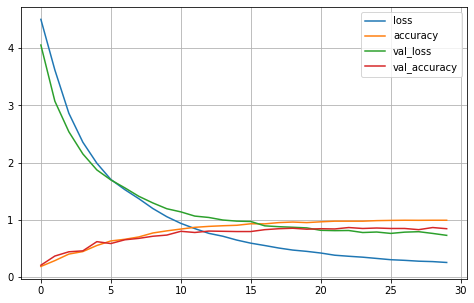

In [ ]:
vis = pd.DataFrame(history.history)
vis.plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.7984


[0.8541022539138794, 0.798353910446167]

#### Experiment using Dropout, Regularization and Batch Normalization

#### Without Dropout

In [ ]:
from functools import partial
from keras.layers import Activation, Dense, Input, Flatten, Dropout, BatchNormalization

In [ ]:
# YOUR CODE HERE
layer = Dense(100, activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [ ]:
# creating regularized dense layer for model
RegularizedDense = partial(keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [ ]:
# defining model with regularization
model = Sequential([
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(43, activation="softmax",
                     kernel_initializer="glorot_uniform")
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

In [ ]:
vis = pd.DataFrame(history.history)
vis.plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

#### Dropout

In [ ]:
model = Sequential([
                    #Flatten(input_shape=[30, 30]),
                    Dense(100, activation="relu", kernel_initializer="he_normal"),
                    #Dropout(rate=0.2),
                    Dense(100, activation="relu"),
                    #Dropout(rate=0.2),
                    Dense(100, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
                    Dropout(rate=0.2),
                    Dense(43, activation="softmax")
                    ])

In [ ]:
# time based learning-rate scheduling
epochs = 100
learning_rate = 0.1
decay_rate = learning_rate / epochs
# define optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, decay=decay_rate)

# Compile model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
model.fit(X_train, y_train,
          batch_size=128,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/100
6/6 [==============================] - 2s 80ms/step - loss: 5.6475 - accuracy: 0.0554 - val_loss: 5.1111 - val_accuracy: 0.1440
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 5.4440 - accuracy: 0.1380 - val_loss: 5.7900 - val_accuracy: 0.2222
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 5.8286 - accuracy: 0.2033 - val_loss: 6.0896 - val_accuracy: 0.2428
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 5.6708 - accuracy: 0.2472 - val_loss: 4.9499 - val_accuracy: 0.2716
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 5.0379 - accuracy: 0.2893 - val_loss: 4.4328 - val_accuracy: 0.3374
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 4.3970 - accuracy: 0.3419 - val_loss: 4.0130 - val_accuracy: 0.3251
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 4.0694 - accuracy: 0.3332 - val_loss: 3.9997 - val_accuracy: 0.3210
Epoch 8/100
6/6 [===

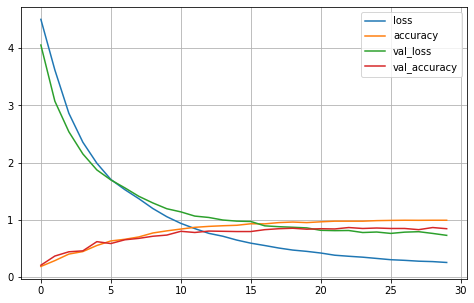

In [ ]:
vis = pd.DataFrame(history.history)
vis.plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 2.8629 - accuracy: 0.4444


[2.862863302230835, 0.4444444477558136]

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.